# Data Preparation for Unet Training

In this file a dataset is created to train a 3D Unet with. This task encompasses the following steps:

- Open Tiff Stacks / h5 or n5 files
- data exploration and visualization
- sample mining
- creation of training datasets

In [17]:
import numpy as np 
import os, sys
import matplotlib.pyplot as plt
from importlib import reload

import h5py, z5py

import utilities

sys.path.append('../tools/')
import mosaic, datasetPreparation

## Open the file and load the potentially large image volume

In [2]:
# Open a h5 file
image_path = "C:\\Users\\Linus Meienberg\\Documents\\ML Datasets\\FruSingleNeuron_20190707\\large_image_0724.h5"
image_h5 = h5py.File(image_path, mode='r+') # Open h5 file with read / write access
print(image_h5['t0'].keys()) # Show Groups (Folders) in root Group of the h5 archive

volume = image_h5['t0/channel0']
print('loaded dataset with shape {}'.format(volume.shape))

<KeysViewHDF5 ['channel0', 'unet']>
loaded dataset with shape (500, 2000, 2000)


## Explore the data

The neuron is a branched and thin structure. While it's proportion is small in 3D images it occipies an even smaller proportion of the imaged volume.
While empty samples have to be included to train the network, samples containing the neuron should be preferred as they are much more informative.
As a proxy one could try to choose samples based on their mean signal strength.

In [10]:
reload(datasetPreparation)

<module 'datasetPreparation' from '../tools\\datasetPreparation.py'>

In [15]:
index, strength = datasetPreparation.sampleMeanSignalStrength(volume, sample_shape=(132,132,132), n_samples=100)

In [16]:
from scipy.special import softmax
proba = softmax(strength)

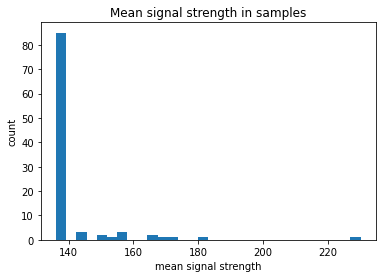

In [23]:
# Plot the distribution of the mean signal strength in our samples
_ = plt.hist(strength, bins=30)
plt.title('Mean signal strength in samples')
plt.xlabel('mean signal strength')
plt.ylabel('count')
plt.show()